#### __Ejemplo 1__

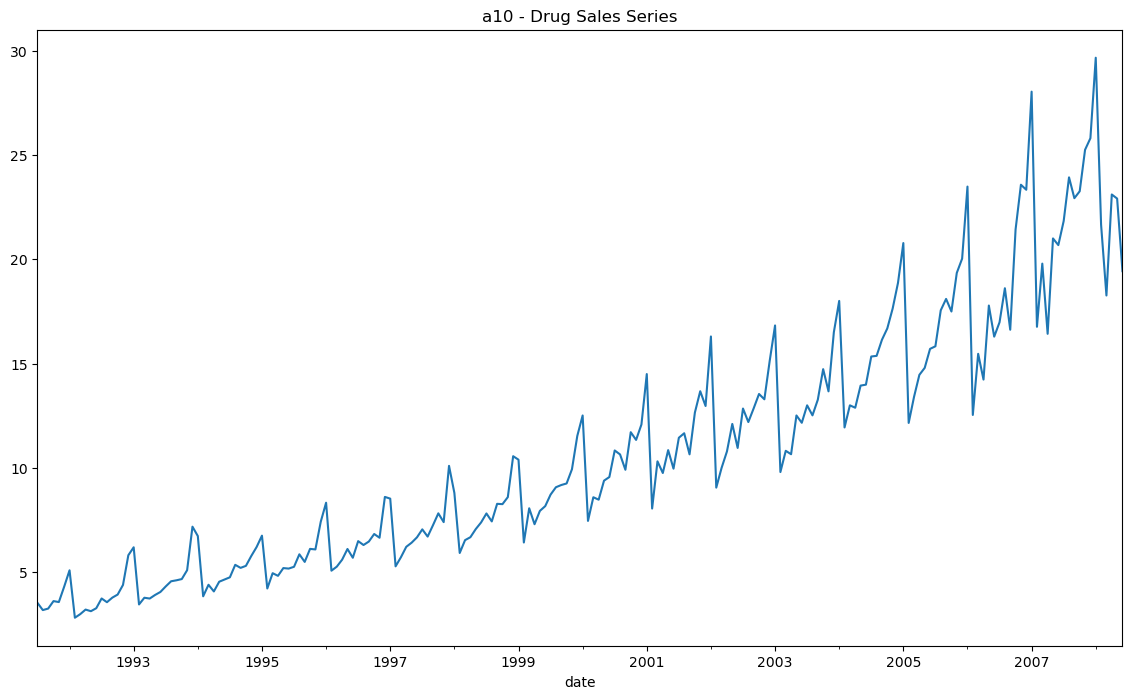

In [1]:
# Setup and Import data
from statsmodels.tsa.stattools import kpss
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [6]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(series)

KPSS Statistic: 2.0131256386303322
p-value: 0.01
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/home/javiermunoz/anaconda3/envs/deeplearning-labs/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### Interpretación de los resultados

La salida del test KPSS contiene 4 objetos:

1. El estadistico de KPSS
2. El p-valor
3. El número de retrasos (t-n) en la ST que se han usado en el test
4. Los valores críticos

El p-valor dado por el test es la puntuación probabilistica en la que se ha de basar para decidir si aceptar o rechazar la hipótesis nula o no. Si el valor es menor que el nivel alpha de significancia (suele ser 0.05), se rechaza la hipótesis. 

Por otro lado, el estadístico del test deberá ser mayor que el valor crítico dado. Dado que hemos puesto como alpha = 0.05, el valor asociado al percentil 5% deberá ser menor al estadístico calculado. Esto es cierto también, por lo que la ST será interpretada como NO estacionaria.

#### __Ejemplo 2__

In [7]:
# ADF test on random numbers
series_random = np.random.randn(100)
kpss_test(series_random)

KPSS Statistic: 0.09656170813647526
p-value: 0.1
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/javiermunoz/anaconda3/envs/deeplearning-labs/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
